In [1]:
def extract_val_and_uncert(astring):
    dp = astring.find(".")
    ob = astring.find("(")
    cb = astring.find(")")
    if dp == -1: dp = ob-1
    value = float(astring[:ob])
    u_digits = astring[ob+1:cb]
    uncertainty = float(u_digits) * 10**(dp-ob+1)
    return (value, uncertainty)
        
extract_val_and_uncert("848.61(26)")

(848.61, 0.26)

In [2]:
data = []
with open("info.txt") as f:
    for i, line in enumerate(f.readlines()):
        if i == 0: continue
        line = line.replace("*", "").replace("#","")
        cols = line.split()
        data.append((int(cols[0]), extract_val_and_uncert(cols[2])))

In [3]:
zs = list(zip(*data))[0]
es, ues = list(zip(*list(zip(*data))[1]))

In [4]:
import matplotlib.pyplot as plt
import numpy as np

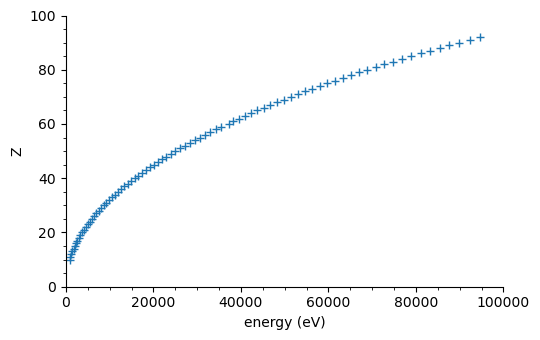

In [5]:
plt.style.use("phys267_jupyter_overhead.mplstyle")
fig, ax = plt.subplots()
ax.plot(es, zs, "+")
ax.set_ylabel("Z")
ax.set_xlabel("energy (eV)")
ax.set_ylim([0,100])
ax.set_xlim([0,100000])
#ax.set_xscale("log")  # make x-axis "log"
fig.tight_layout()
fig.savefig("zs_vs_es_generated.pdf")

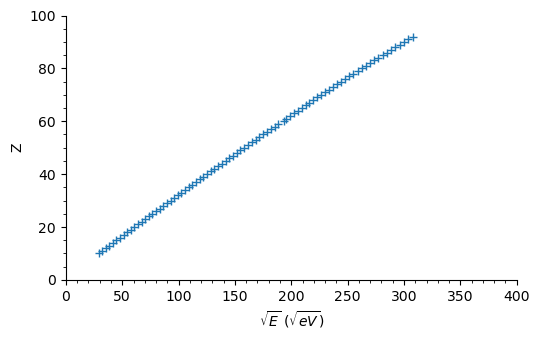

In [6]:
plt.style.use("phys267_jupyter_overhead.mplstyle")
fig, ax = plt.subplots()
ax.plot(np.sqrt(es), zs, "+")
ax.set_ylabel("Z")
ax.set_xlabel("$\sqrt{E}$ ($\sqrt{eV}$)")
ax.set_ylim([0,100])
ax.set_xlim([0,400])
#ax.set_xscale("log")  # make x-axis "log"
fig.tight_layout()
fig.savefig("zs_vs_sqrt_of_es_generated.pdf")

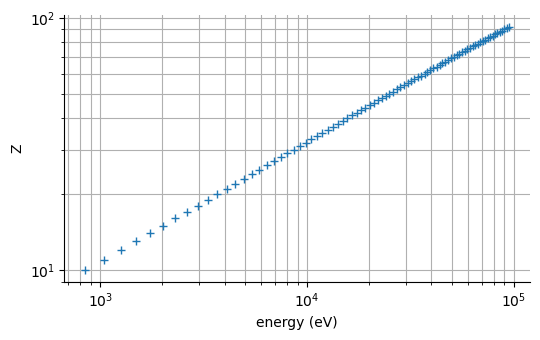

In [7]:
plt.style.use("phys267_jupyter_overhead.mplstyle")
fig, ax = plt.subplots()
ax.plot(es, zs, "+")
ax.set_ylabel("Z")
ax.set_xlabel("energy (eV)")
#ax.set_ylim([0,100])
#ax.set_xlim([0,400])
ax.set_xscale("log")  # make x-axis "log"
ax.set_yscale("log")
ax.grid(which="both")
fig.tight_layout()
fig.savefig("loglog_zs_vs_es_generated.pdf")